<a href="https://colab.research.google.com/github/UsmanShafeeq/Advanced-Machine-Learning-Project/blob/main/Basic_deep_learning_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step-by-step tutorial along with code for a basic deep learning project

# Step 2: Import the Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


# Step 3: Load and Explore the MNIST Dataset
The MNIST dataset contains 70,000 images of handwritten digits (0-9), each of size 28x28 pixels. TensorFlow includes this dataset, so you can load it directly:

In [2]:
# Load the dataset
mnist = tf.keras.datasets.mnist

# Split into training and testing data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the images to [0, 1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check the shape of the data
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


# Step 4: Visualize the Data
It's always good to visualize the data you're working with:

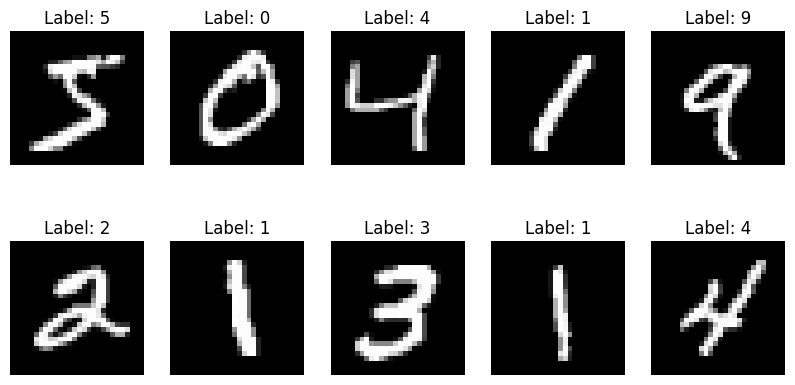

In [3]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


# Step 5: Build the Neural Network Model
We'll build a simple feedforward neural network using TensorFlow:

In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the input images
    layers.Dense(128, activation='relu'),  # First hidden layer
    layers.Dropout(0.2),  # Dropout layer to prevent overfitting
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Step 6: Train the Model
Now, we'll train the model on the training data:

In [5]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8479 - loss: 0.5250 - val_accuracy: 0.9542 - val_loss: 0.1571
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9507 - loss: 0.1660 - val_accuracy: 0.9637 - val_loss: 0.1244
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9646 - loss: 0.1164 - val_accuracy: 0.9723 - val_loss: 0.0981
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9705 - loss: 0.0956 - val_accuracy: 0.9712 - val_loss: 0.0967
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9751 - loss: 0.0776 - val_accuracy: 0.9744 - val_loss: 0.0863


# Step 7: Evaluate the Model
After training, we evaluate the model on the test data:

In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9720 - loss: 0.0955
Test accuracy: 0.9750


# Step 8: Make Predictions
Let's make some predictions with the trained model:

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


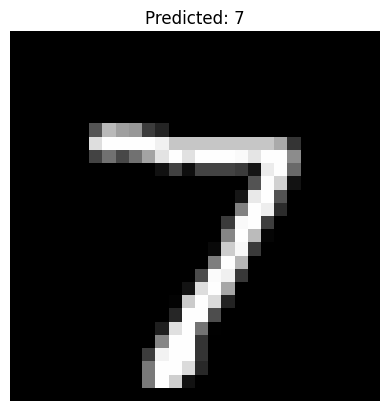

In [7]:
predictions = model.predict(x_test)

# Display the first test image and the model's prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[0])}")
plt.axis('off')
plt.show()


# Step 9: Analyze the Results
You can visualize the training process, such as the accuracy and loss over epochs:

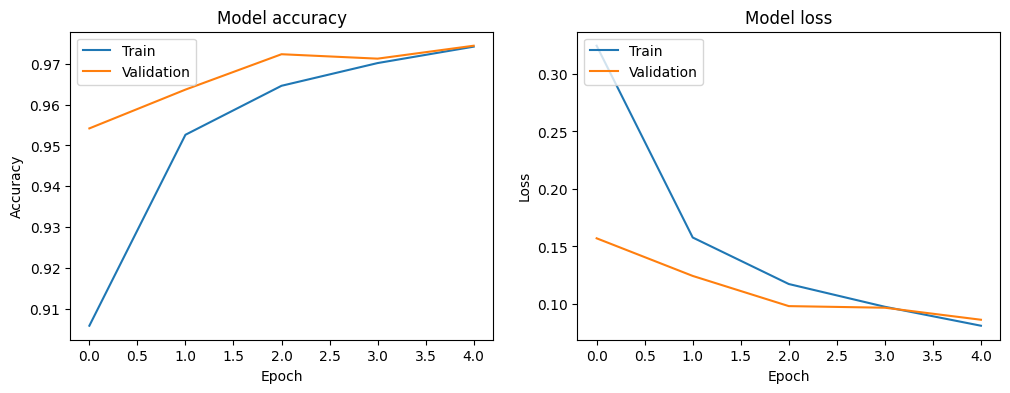

In [8]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()
